In [7]:
import matplotlib.pyplot as plt
import torch

In [54]:
# Example from https://d2l.ai/chapter_optimization/momentum.html
def loss_func(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

In [32]:
x1list = torch.linspace(-4, 4, 100)
x2list = torch.linspace(-4, 4, 100)

x1grid, x2grid = torch.meshgrid(x1list, x2list)

x1grid, x2grid

(tensor([[-4.0000, -4.0000, -4.0000,  ..., -4.0000, -4.0000, -4.0000],
         [-3.9192, -3.9192, -3.9192,  ..., -3.9192, -3.9192, -3.9192],
         [-3.8384, -3.8384, -3.8384,  ..., -3.8384, -3.8384, -3.8384],
         ...,
         [ 3.8384,  3.8384,  3.8384,  ...,  3.8384,  3.8384,  3.8384],
         [ 3.9192,  3.9192,  3.9192,  ...,  3.9192,  3.9192,  3.9192],
         [ 4.0000,  4.0000,  4.0000,  ...,  4.0000,  4.0000,  4.0000]]),
 tensor([[-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         ...,
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000]]))

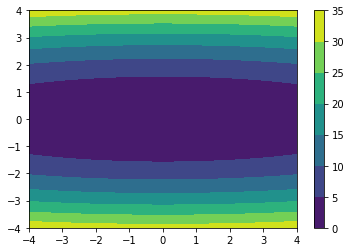

In [33]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot);

In [35]:
parameters = torch.rand(2) * 8 - 4
parameters

tensor([ 2.8403, -3.0877])

In [89]:
# Mini-batch SGD

parameters = torch.tensor([3.0, 3.0], requires_grad=True)

learning_rate = 0.4
num_epochs = 10

phistory = [parameters.detach().clone()]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        parameters -= learning_rate * parameters.grad
    
    phistory.append(parameters.detach().clone())

18.899999618530273
7.241761207580566
2.9775543212890625
1.3855278491973877
0.764228105545044
0.49978888034820557
0.37008193135261536
0.29417914152145386
0.2421322613954544
0.2024708092212677


In [90]:
phistory

[tensor([3., 3.]),
 tensor([ 2.7600, -1.8000]),
 tensor([2.5392, 1.0800]),
 tensor([ 2.3361, -0.6480]),
 tensor([2.1492, 0.3888]),
 tensor([ 1.9772, -0.2333]),
 tensor([1.8191, 0.1400]),
 tensor([ 1.6735, -0.0840]),
 tensor([1.5397, 0.0504]),
 tensor([ 1.4165, -0.0302]),
 tensor([1.3032, 0.0181])]

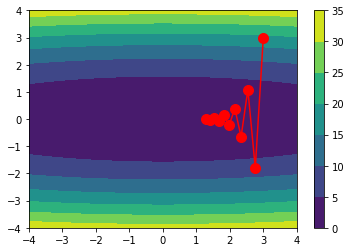

In [91]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory]
x2 = [p[1].item() for p in phistory]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

$$
v_{t+1} = β v_t + η \nabla L(\hat y, y) \\
θ_{t+1} = θ_t - v_{t+1}
$$

In [118]:
# Mini-batch SGD with momentum

parameters = torch.tensor([3.0, 3.0], requires_grad=True)
momentum = torch.zeros_like(parameters)

# Hyperparameters
learning_rate = 0.1
num_epochs = 10
beta = 0.9

phistory = [parameters.detach().clone()]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        
        # Compute momentum
        momentum = beta * momentum + (1 - beta) * parameters.grad
        parameters -= learning_rate * momentum
    
    phistory.append(parameters.detach().clone())

18.899999618530273
17.485204696655273
15.006771087646484
11.921643257141113
8.702481269836426
5.7624664306640625
3.403453826904297
1.7908231019973755
0.9537245035171509
0.8058463335037231


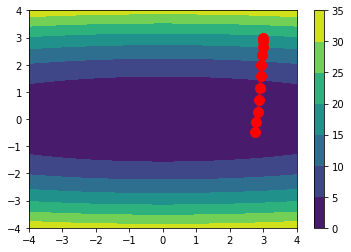

In [119]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory]
x2 = [p[1].item() for p in phistory]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

# Exponential Averaging

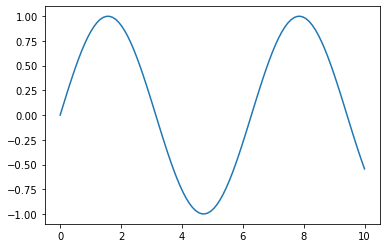

In [103]:
x = torch.linspace(0, 10, 100)
y = torch.sin(x)

plt.plot(x, y);

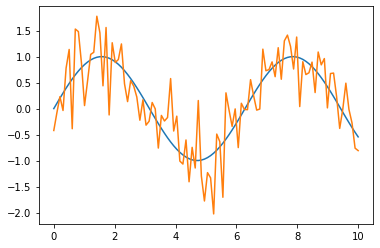

In [121]:
ynoisy = torch.sin(x) + torch.randn_like(x) * 0.5

plt.plot(x, y);
plt.plot(x, ynoisy);

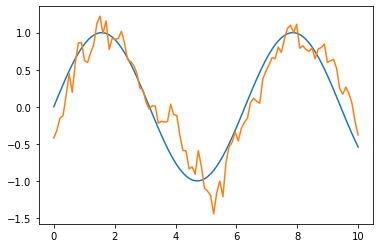

In [124]:
beta = 0.7

ysmooth = [ynoisy[0]]
for yval in ynoisy[1:]:
    ysmooth.append(beta * ysmooth[-1] + (1 - beta) * yval)

plt.plot(x, y);
plt.plot(x, ysmooth);